# Importing Python Libraries

In [59]:
%matplotlib inline
#import bokeh as bk
#import seaborn as sns

import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt

#from mpl_toolkits.basemap import Basemap
#import geopandas as gpd

import requests
import descartes

import seaborn as sns
import matplotlib


# Step 1. Loading the data set to the Pandas
Data source: https://www.kaggle.com/datasets/fanbyprinciple/north-korea-missile-test-database

In [7]:
# Tesiting with three items
missile_stats = pd.read_csv('data/north_korea_missile_tests_database_050217.csv')
missile_stats.head(3)

,F1,Date,Date Entered/Updated,Missile Name,Missile Type,Launch Agency/Authority,Facility Name,Facility Location,Other Name,Facility Latitude,Facility Longitude,Landing Location,Apogee (km),Distance Travelled (km),Confirmation Status,Success,Additional Information,Source(s)
0,1,9-Apr-84,23-Dec-16,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.8499966,129.666664,Unknown,Unknown,Unknown,Confirmed,Success,The 1984 tests possibly took place over the co...,http://www.nti.org/media/pdfs/north_korea_miss...
1,2,9-Apr-84,23-Dec-16,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.8499966,129.666664,Unknown,Unknown,Unknown,Confirmed,Success,NaN,http://www.nti.org/media/pdfs/north_korea_miss...
2,3,9-Apr-84,23-Dec-16,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.8499966,129.666664,Unknown,200,Unknown,Confirmed,Success,NaN,http://www.astronautix.com/g/gitdaeryung.html;...


# 2. Parsing data for the date/time related analysis

In [60]:
missile_stats = pd.read_csv('data/north_korea_missile_tests_database_050217.csv', parse_dates=['Date', 'Date Entered/Updated'])


Initial attempt for mapping the location data

In [61]:
map_fig = px.scatter_geo(missile_stats, lat = "Facility Latitude", lon = "Facility Longitude", 
                         color = "Facility Name", hover_name="Facility Location", 
                         hover_data=["Other Name", "Success"])
map_fig.update_layout(mapbox_style="open-street-map")
#map_fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}) This option allows to adjust figure. As you can see, the map is not oriented correctly.
map_fig.show()


# 3. Changing types of the data

In [62]:
print(missile_stats['Facility Latitude'].dtype) 
print(missile_stats['Facility Longitude'].dtype) 

missile_stats

# The result shows that location data is object. We must convert it to float to plot it on a map

object
object


,F1,Date,Date Entered/Updated,Missile Name,Missile Type,Launch Agency/Authority,Facility Name,Facility Location,Other Name,Facility Latitude,Facility Longitude,Landing Location,Apogee (km),Distance Travelled (km),Confirmation Status,Success,Additional Information,Source(s)
0,1,1984-04-09,2016-12-23,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.8499966,129.666664,Unknown,Unknown,Unknown,Confirmed,Success,The 1984 tests possibly took place over the co...,http://www.nti.org/media/pdfs/north_korea_miss...
1,2,1984-04-09,2016-12-23,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.8499966,129.666664,Unknown,Unknown,Unknown,Confirmed,Success,NaN,http://www.nti.org/media/pdfs/north_korea_miss...
2,3,1984-04-09,2016-12-23,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.8499966,129.666664,Unknown,200,Unknown,Confirmed,Success,NaN,http://www.astronautix.com/g/gitdaeryung.html;...
3,4,1984-09-01,2016-12-23,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.8499966,129.666664,Unknown,Unknown,Unknown,Confirmed,Failure,NaN,"Joseph S. Bermudez, ""A History of Ballistic Mi..."
4,5,1984-09-01,2016-12-23,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.8499966,129.666664,Unknown,200,Unknown,Confirmed,Failure,NaN,http://www.astronautix.com/g/gitdaeryung.html;...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,102,2017-03-06,2017-03-07,ER Scud,MRBM,Hwasong Artillery Units of the KPA Strategic F...,Sohae Satellite Launching Station,"Cholsan County, North Pyongan Province",NaN,39.6596,124.7057,Sea of Japan or East Sea,260,1000,Confirmed,Success,North Korea launched these 4 missiles almost s...,http://www.cnn.com/2017/03/06/asia/north-korea...
102,103,2017-03-22,2017-03-24,Unknown,Unknown,NaN,Wonsan Kalma International Airport,"Kangwon Province, (North Korea)",Wonsan Airbase,39.1677,127.4817,NaN,0,NaN,Confirmed,Failure,Initial reports on this test were muddled with...,http://www.reuters.com/article/us-northkorea-m...
103,104,2017-04-05,2017-04-18,KN-17,SRBM,NaN,Sinpo Shipyard,South Hamgyong province,NaN,40.0368,128.1839,Sea of Japan or East Sea,189,60,Confirmed,Failure,The given trajectory of 60/190 is very strange...,https://www.nytimes.com/2017/04/04/world/asia/...
104,105,2017-04-16,2017-04-18,KN-17,SRBM,NaN,Sinpo Shipyard,South Hamgyong province,NaN,40.0368,128.1839,NaN,0,0,Confirmed,Failure,The missile appears to have blown up almost in...,http://www.cnn.com/2017/04/15/asia/north-korea...


In [65]:
# I'm working on chart. Finiding the most tested facilities by numbers

facility_frequencies = missile_stats['Facility Name'].value_counts()
facility_frequencies


North Wonsan                          20
Tonghae Satellite Launching Ground    17
Kittaeryong Missile Base              17
Hwangju                               12
Wonsan Kalma International Airport    11
Sinpo Shipyard                         8
Sohae Satellite Launching Station      7
Sunchon Airbase                        4
Kaesong                                2
Nampo                                  2
Panghyon Airbase                       2
Chihari Missile Base                   1
Unknown                                1
Kusong Testing Ground                  1
Pukchang Airfield                      1
Name: Facility Name, dtype: int64

# Bar chart of number of testings by facility names 

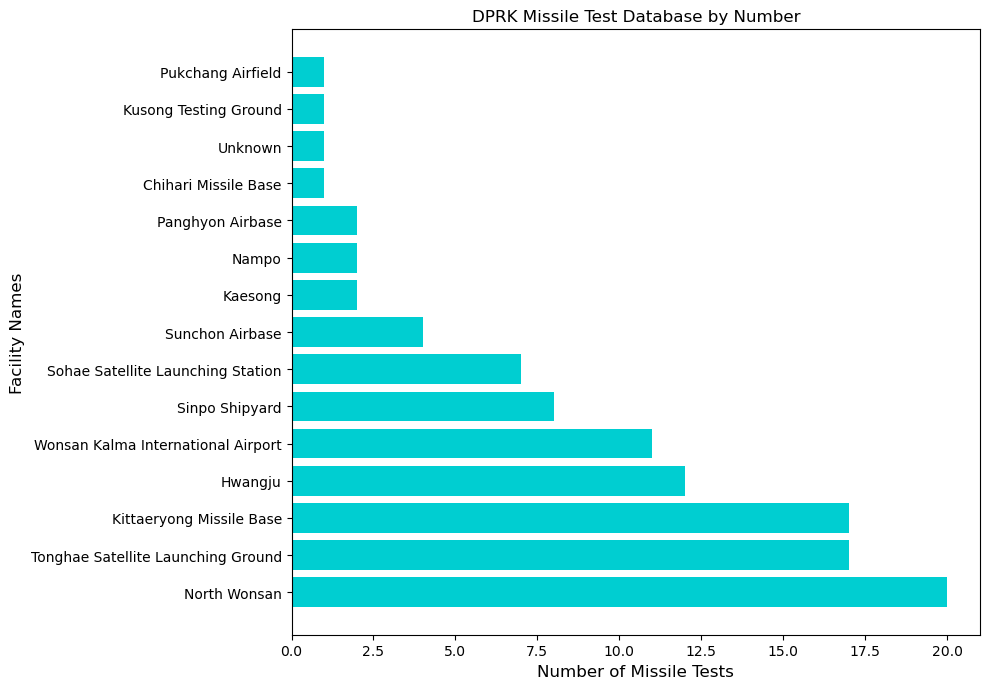

In [66]:
plt.figure(figsize=(10, 7))

plt.barh(facility_frequencies.index, facility_frequencies.values, color ='#00CED1')
# Adding labels and title
plt.tick_params(axis='x', labelsize=10)
plt.xlabel('Number of Missile Tests', size=12)
plt.ylabel('Facility Names', size = 12)
plt.title('DPRK Missile Test Database by Number')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


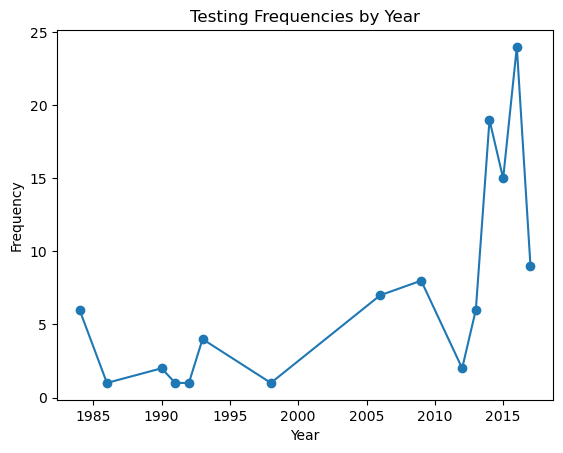

In [68]:
missile_stats['Year'] = pd.to_datetime(missile_stats['Date']).dt.year

yearly_frequencies = missile_stats['Year'].value_counts().sort_index()

yearly_frequencies = yearly_frequencies.sort_index()

plt.plot(yearly_frequencies.index, yearly_frequencies.values, marker='o')

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Testing Frequencies by Year')

plt.show()



In [17]:
missile_stats['Frequencies'] = missile_stats['Facility Name'].map(facility_frequencies)


# plt.xlabel('Number of Views (In Millions)')
# plt.ylabel('Channel Names')
# plt.title('The Most Viewed YouTube Channels (Nov 2017 - Jun 2018)')


In [16]:
missile_stats['Facility Latitude'] = missile_stats['Facility Latitude'].replace('Unknown', None)
missile_stats['Facility Longitude'] = missile_stats['Facility Longitude'].replace('Unknown', None)

missile_stats['Facility Latitude'] = missile_stats['Facility Latitude'].astype(float)
missile_stats['Facility Longitude'] = missile_stats['Facility Longitude'].astype(float)

In [17]:
map_fig2 = px.scatter_mapbox(missile_stats, lat = 'Facility Latitude', lon = 'Facility Longitude', 
                             color = missile_stats["Facility Name"],
                             size = 'Frequencies',  # Column containing frequencies
                             zoom = 6,
                             center={'lat': 39.17180415583127, 'lon': 126.551952046587},
                             width = 1200,
                             height = 900,
                             title = 'DPRK Nuclear Facility Locations')

map_fig2.update_layout(mapbox_style="carto-positron", title_font_size=25, title_font_family="Old Standard TT")
#map_fig2.update_layout(margin={"r":10, "t":50, "l":0, "b":10})
map_fig2.update_layout(margin_autoexpand=True)


In [128]:
missile_names = missile_stats["Missile Name"].value_counts()
missile_names

Scud-C         27
KN-02          20
Nodong         16
Scud-B         10
Musudan         8
ER Scud         7
Polaris-1       6
Unknown         3
Unha-3          3
Unha            2
KN-17           2
Taepodong-1     1
Polaris-2       1
Name: Missile Name, dtype: int64

In [129]:
missile_types = missile_stats["Missile Type"].value_counts()
missile_types

SRBM       59
MRBM       24
IRBM        8
SLV         6
SLBM        6
Unknown     3
Name: Missile Type, dtype: int64

In [136]:
facility_names = missile_stats["Facility Name"].value_counts()
facility_names

North Wonsan                          20
Tonghae Satellite Launching Ground    17
Kittaeryong Missile Base              17
Hwangju                               12
Wonsan Kalma International Airport    11
Sinpo Shipyard                         8
Sohae Satellite Launching Station      7
Sunchon Airbase                        4
Kaesong                                2
Nampo                                  2
Panghyon Airbase                       2
Chihari Missile Base                   1
Unknown                                1
Kusong Testing Ground                  1
Pukchang Airfield                      1
Name: Facility Name, dtype: int64

In [135]:
most_tested_facility = missile_stats.groupby("Facility Name")['Missile Type'].value_counts()

#sort_values(by = 'Missile Type', ascending=False)

#most_views_pd = most_views.head(10).sort_values(by = 'views', ascending=True)

most_tested_facility

Facility Name                       Missile Type
Chihari Missile Base                SRBM             1
Hwangju                             MRBM             6
                                    SRBM             6
Kaesong                             SRBM             2
Kittaeryong Missile Base            SRBM            11
                                    MRBM             6
Kusong Testing Ground               MRBM             1
Nampo                               SRBM             2
North Wonsan                        SRBM            20
Panghyon Airbase                    IRBM             2
Pukchang Airfield                   Unknown          1
Sinpo Shipyard                      SLBM             6
                                    SRBM             2
Sohae Satellite Launching Station   MRBM             4
                                    SLV              3
Sunchon Airbase                     MRBM             4
Tonghae Satellite Launching Ground  SRBM            10
                